In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
# download data
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-01/weekly_gas_prices.csv')

df.head()

,date,fuel,grade,formulation,price
0,1990-08-20,gasoline,regular,all,1.191
1,1990-08-20,gasoline,regular,conventional,1.191
2,1990-08-27,gasoline,regular,all,1.245
3,1990-08-27,gasoline,regular,conventional,1.245
4,1990-09-03,gasoline,regular,all,1.242


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22360 entries, 0 to 22359
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         22360 non-null  object 
 1   fuel         22360 non-null  object 
 2   grade        22360 non-null  object 
 3   formulation  19672 non-null  object 
 4   price        22360 non-null  float64
dtypes: float64(1), object(4)
memory usage: 873.6+ KB


In [6]:
print(min(df['date']))
print(max(df['date']))

1990-08-20
2025-06-23


In [8]:
print(df['fuel'].unique())
print(df['grade'].unique())
print(df['formulation'].unique())

['gasoline' 'diesel']
['regular' 'all' 'midgrade' 'premium' 'ultra_low_sulfur' 'low_sulfur']
['all' 'conventional' nan 'reformulated']


In [33]:
# convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22360 entries, 0 to 22359
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         22360 non-null  datetime64[ns]
 1   fuel         22360 non-null  object        
 2   grade        22360 non-null  object        
 3   formulation  19672 non-null  object        
 4   price        22360 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 873.6+ KB


## Petrol

In [51]:
petrol = df[df['fuel'] == 'gasoline']

print(petrol['fuel'].unique())
print(petrol['grade'].unique())
print(petrol['formulation'].unique())

['gasoline']
['regular' 'all' 'midgrade' 'premium']
['all' 'conventional' 'reformulated']


## All grades, all formulations

In [52]:
reg_petrol = petrol[(petrol['grade'] == 'all') & (petrol['formulation'] == 'all')]

reg_petrol

,date,fuel,grade,formulation,price
262,1993-04-05,gasoline,all,all,1.068
265,1993-04-12,gasoline,all,all,1.079
268,1993-04-19,gasoline,all,all,1.079
271,1993-04-26,gasoline,all,all,1.086
274,1993-05-03,gasoline,all,all,1.086
...,...,...,...,...,...
22290,2025-05-26,gasoline,all,all,3.288
22304,2025-06-02,gasoline,all,all,3.256
22318,2025-06-09,gasoline,all,all,3.235
22332,2025-06-16,gasoline,all,all,3.265


In [53]:
# check each date has a unique value
print(len(reg_petrol))
print(len(reg_petrol['date'].unique()))

1682
1682


### Plot

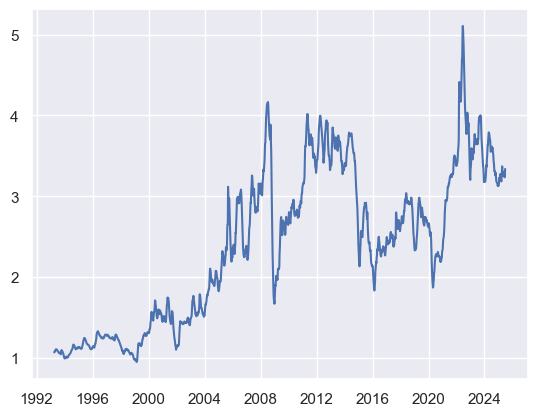

In [54]:
sns.set_theme()

plt.plot('date',
         'price',
         data = reg_petrol)

plt.show()

# Diesel

In [34]:
diesel = df[df['fuel'] == 'diesel']

print(diesel['fuel'].unique())
print(diesel['grade'].unique())
print(diesel['formulation'].unique())

['diesel']
['all' 'ultra_low_sulfur' 'low_sulfur']
[nan]


## All grades

In [48]:
all_diesel = diesel[diesel['grade'] == 'all']

all_diesel

,date,fuel,grade,formulation,price
415,1994-03-21,diesel,all,NaN,1.106
419,1994-03-28,diesel,all,NaN,1.107
423,1994-04-04,diesel,all,NaN,1.109
427,1994-04-11,diesel,all,NaN,1.108
431,1994-04-18,diesel,all,NaN,1.105
...,...,...,...,...,...
22302,2025-05-26,diesel,all,NaN,3.487
22316,2025-06-02,diesel,all,NaN,3.451
22330,2025-06-09,diesel,all,NaN,3.471
22344,2025-06-16,diesel,all,NaN,3.571


In [49]:
# check each date has a unique value
print(len(all_diesel))
print(len(all_diesel['date'].unique()))

1632
1632


### Plot

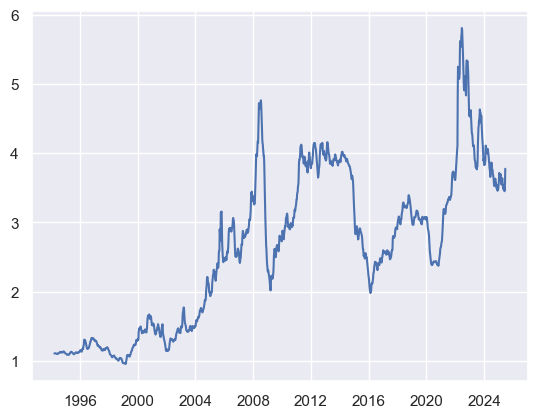

In [50]:
sns.set_theme()

plt.plot('date',
         'price',
         data = all_diesel)

plt.show()

# Combined

In [61]:
diesel_prep = all_diesel[['date', 'price']]

diesel_prep = diesel_prep.rename(columns = {'price': 'diesel_price'})

petrol_prep = reg_petrol[['date', 'price']]

petrol_prep = petrol_prep.rename(columns = {'price': 'petrol_price'})

combined = diesel_prep.merge(petrol_prep, on = 'date')

combined

,date,diesel_price,petrol_price
0,1994-03-21,1.106,1.007
1,1994-03-28,1.107,1.012
2,1994-04-04,1.109,1.011
3,1994-04-11,1.108,1.028
4,1994-04-18,1.105,1.033
...,...,...,...
1627,2025-05-26,3.487,3.288
1628,2025-06-02,3.451,3.256
1629,2025-06-09,3.471,3.235
1630,2025-06-16,3.571,3.265


In [62]:
# check each date has a unique value
print(len(combined))
print(len(combined['date'].unique()))

1632
1632


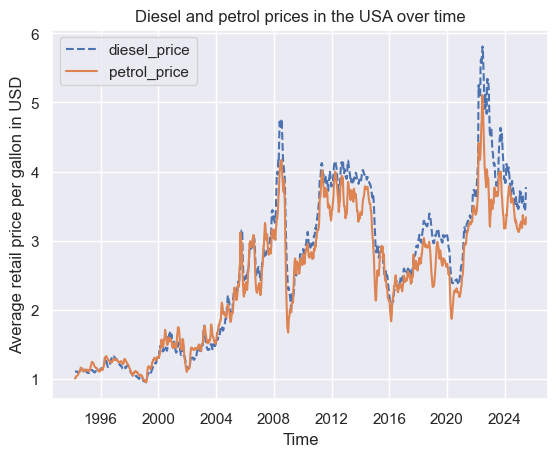

In [68]:
plt.plot('date', 'diesel_price', data = combined,
         marker = '',
         linestyle = 'dashed')

plt.plot('date', 'petrol_price', data = combined)

plt.legend()
plt.title('Diesel and petrol prices in the USA over time')
plt.xlabel('Time')
plt.ylabel('Average retail price per gallon in USD')

plt.savefig('plot.png')

plt.show()